<a href="https://colab.research.google.com/github/Szczureczek1983/Applied-Data-Science-with-Python-and-Jupyter/blob/master/podejmowanie%20decyzji_SDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [10]:
print(df.shape)

(21613, 21)


In [11]:
print(df.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [12]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('id')
df.price = df.price.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [13]:
df['house_age'] = df['date'].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr:
                                               0 if  yr == 0
                                               else 1)
df = df.drop('date', axis = 1)
df = df.drop('yr_renovated', axis = 1)
df = df.drop('yr_built', axis = 1)

In [14]:
pd.set_option('precision',2)
print(df.describe())

          price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
count  2.16e+04  21613.00   21613.00     21613.00  2.16e+04  21613.00   
mean   5.40e+05      3.37       1.75      2079.90  1.51e+04      1.45   
std    3.67e+05      0.93       0.73       918.44  4.14e+04      0.55   
min    7.50e+04      0.00       0.00       290.00  5.20e+02      1.00   
25%    3.22e+05      3.00       1.00      1427.00  5.04e+03      1.00   
50%    4.50e+05      3.00       2.00      1910.00  7.62e+03      1.00   
75%    6.45e+05      4.00       2.00      2550.00  1.07e+04      2.00   
max    7.70e+06     33.00       8.00     13540.00  1.65e+06      3.00   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count    2.16e+04  21613.00   21613.00  21613.00    21613.00       21613.00   
mean     7.54e-03      0.23       3.41      7.66     1788.39         291.51   
std      8.65e-02      0.77       0.65      1.18      828.09         442.58   
min      0.00e+00      0.0

In [15]:
correlation = df.corr(method = 'pearson')
columns = correlation.nlargest(10, 'price').index
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
price,1.00,3.08e-01,0.51,0.70,8.97e-02,2.37e-01,2.66e-01,3.97e-01,3.64e-02,0.67,6.06e-01,0.32,-5.32e-02,3.07e-01,0.02,5.85e-01,8.24e-02,-0.05,1.26e-01
bedrooms,0.31,1.00e+00,0.47,0.58,3.17e-02,1.56e-01,-6.58e-03,7.95e-02,2.85e-02,0.36,4.78e-01,0.30,-1.53e-01,-8.93e-03,0.13,3.92e-01,2.92e-02,-0.15,1.86e-02
bathrooms,0.51,4.67e-01,1.00,0.70,8.53e-02,4.85e-01,5.88e-02,1.77e-01,-1.26e-01,0.61,6.40e-01,0.25,-1.60e-01,3.14e-02,0.18,5.10e-01,8.08e-02,-0.43,6.00e-02
sqft_living,0.70,5.77e-01,0.70,1.00,1.73e-01,3.53e-01,1.04e-01,2.85e-01,-5.88e-02,0.76,8.77e-01,0.44,-1.99e-01,5.25e-02,0.24,7.56e-01,1.83e-01,-0.32,5.51e-02
sqft_lot,0.09,3.17e-02,0.09,0.17,1.00e+00,-8.95e-03,2.16e-02,7.47e-02,-8.96e-03,0.11,1.84e-01,0.02,-1.30e-01,-8.57e-02,0.23,1.45e-01,7.19e-01,-0.05,7.75e-03
floors,0.24,1.56e-01,0.48,0.35,-8.95e-03,1.00e+00,1.96e-02,2.47e-02,-2.93e-01,0.47,5.18e-01,-0.24,-9.67e-02,2.96e-02,0.16,2.97e-01,-1.33e-02,-0.58,-7.85e-03
waterfront,0.27,-6.58e-03,0.06,0.10,2.16e-02,1.96e-02,1.00e+00,4.02e-01,1.67e-02,0.08,7.21e-02,0.08,3.03e-02,-1.43e-02,-0.04,8.65e-02,3.07e-02,0.03,9.33e-02
view,0.40,7.95e-02,0.18,0.28,7.47e-02,2.47e-02,4.02e-01,1.00e+00,4.60e-02,0.25,1.68e-01,0.28,8.48e-02,6.16e-03,-0.08,2.80e-01,7.26e-02,0.05,1.04e-01
condition,0.04,2.85e-02,-0.13,-0.06,-8.96e-03,-2.93e-01,1.67e-02,4.60e-02,1.00e+00,-0.14,-1.58e-01,0.17,3.03e-03,-1.49e-02,-0.11,-9.28e-02,-3.41e-03,0.36,-6.01e-02
grade,0.67,3.57e-01,0.61,0.76,1.14e-01,4.73e-01,8.28e-02,2.51e-01,-1.45e-01,1.00,7.56e-01,0.17,-1.85e-01,1.14e-01,0.20,7.13e-01,1.19e-01,-0.45,1.40e-02


In [16]:
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

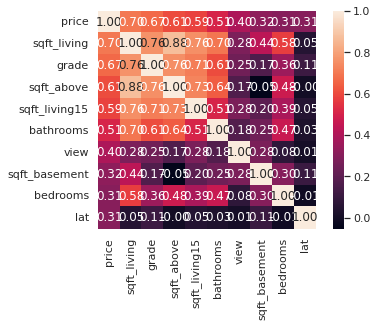

In [20]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale = 1.0)
heatmap=sns.heatmap(correlation_map, cbar = True, annot = True,
                    square = True, fmt='.2f',
                    yticklabels = columns.values,
                    xticklabels = columns.values)
plt.show()

In [22]:
df['price'] = np.log(df['price'])
df['sqrt_living'] = np.log(df['sqft_living'])

In [21]:
X=df[columns]
Y = X['price'].values
X = X.drop('price', axis = 1).values

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.2, random_state = 42
)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [33]:
kfold = KFold(n_splits = 10, random_state= 21, shuffle=True)

In [34]:
scaler=StandardScaler() #standaryzuje kolumny od 0 do 1

In [38]:
kfold = KFold(n_splits = 10, random_state= 21, shuffle=True)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
cv_results = cross_val_score(LinearRegression(), X_train_sc, Y_train, 
                             cv = kfold, scoring='neg_mean_squared_error')
print('LinearRegressor cv score: ', cv_results.mean(), cv_results.std())

LinearRegressor cv score:  -47358840020.191605 11296126558.058945


In [37]:
cv_results = cross_val_score(DecisionTreeRegressor(), X_train_sc, Y_train, 
                             cv = kfold, scoring='neg_mean_squared_error')
print('DEcisiontree: ', cv_results.mean(), cv_results.std())

DEcisiontree:  -52076217371.200745 5535432687.449186


Załóżmy, że bląd dla drzewa dec jest mniejszy. dobieramy zatem parametry dla drzewa


In [39]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(max_depth = np.array([3,6,9]), 
                  min_samples_split = np.array([7,10,20])
                  )
model = DecisionTreeRegressor(random_state=21)
kfold = KFold(n_splits = 10, random_state= 21, shuffle= True)
grid= GridSearchCV(estimator=model, 
                   param_grid = param_grid,
                   scoring = "neg_mean_squared_error",
                   cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
  print('%f(%f) with %r' % (mean, stdev, param))


-55608402319.371902(10351453120.905880) with {'max_depth': 3, 'min_samples_split': 7}
-55608402319.371902(10351453120.905880) with {'max_depth': 3, 'min_samples_split': 10}
-55608402319.371902(10351453120.905880) with {'max_depth': 3, 'min_samples_split': 20}
-39986975232.487564(7036656408.742651) with {'max_depth': 6, 'min_samples_split': 7}
-40232388887.231590(6720786923.262176) with {'max_depth': 6, 'min_samples_split': 10}
-42876877564.628769(9762034620.729128) with {'max_depth': 6, 'min_samples_split': 20}
-37502996962.000473(6035775022.008373) with {'max_depth': 9, 'min_samples_split': 7}
-38172342194.648544(5696856692.771467) with {'max_depth': 9, 'min_samples_split': 10}
-39138928586.074669(7963639469.208838) with {'max_depth': 9, 'min_samples_split': 20}


In [40]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -37502996962.000473 using {'max_depth': 9, 'min_samples_split': 7}


In [41]:
from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor(random_state=21, min_samples_split=7,
                              max_depth=9)
model.fit(rescaledX, Y_train)
rescaled_X_test=scaler.transform(X_test)
predictions=model.predict(rescaled_X_test)
print(mean_squared_error(Y_test, predictions))

46993259361.21345


In [42]:
compare = pd.DataFrame({"Pred": predictions, "Test_Data":Y_test})
compare.head()

,Pred,Test_Data
0,3.92e+05,365000
1,8.07e+05,865000
2,9.73e+05,1038000
3,1.90e+06,1490000
4,8.47e+05,711000


In [45]:
actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test-actual_predicted)
compare=pd.DataFrame({'Pred': actual_predicted, "Test Data": actual_y_test,
                      'Diff': diff})
compare.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


,Pred,Test Data,Diff
0,inf,inf,NaN
1,inf,inf,NaN
2,inf,inf,NaN
3,inf,inf,NaN
4,inf,inf,NaN
